Modelos de redes neuronales Regresión Presentados por Laura Leyva

## **Red neuronal Regresión**

In [2]:
import keras

# Cargar el conjunto de datos MNIST
mnist = keras.datasets.mnist

# Cargue la división de entrenamiento y prueba del conjunto de datos MNIST
(training_images, training_labels), (test_images,test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Label: 0
Image:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 2

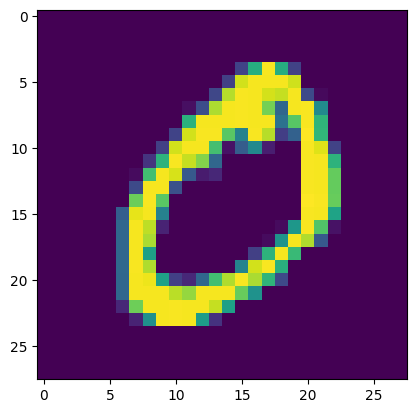

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Se puede colocar acá entre 0 y 59999
index = 1

# Imprime la etiqueta y la imagen.
np.set_printoptions (linewidth=320)

print (f'Label: {training_labels[index]}')
print (f'Image:\n {training_images[index]}')

# Visualiza la imagen
plt.imshow (training_images[index])

In [4]:
# Normalizar los valores de pixeles del tren y probar las imágenes.

training_images = training_images / 255.0
test_images = test_images / 255.0

In [5]:
# Construir el modelo de clasificación.

model =keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28)),keras.layers.Dense(128, activation='relu'),keras.layers.Dense(10, activation='softmax')])

In [6]:
# Compilar el modelo

model.compile (optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary ()

# Param#  (#Input x #Neuron)+#Input

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Entrenar el modelo
history = model.fit (training_images, training_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2576 - accuracy: 0.9268
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1090 - accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0742 - accuracy: 0.9786
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0574 - accuracy: 0.9824
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0434 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0343 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0280 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0236 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0181 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0

<Axes: >

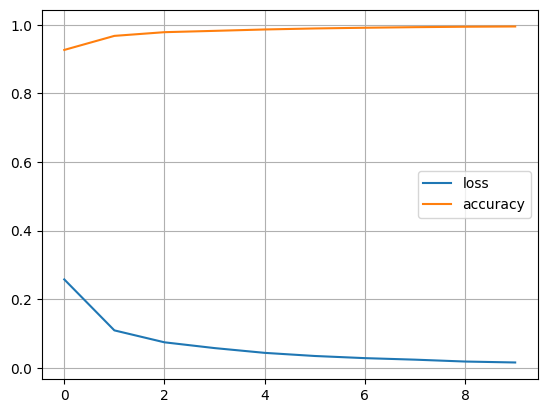

In [10]:
# Graficar el historial de entrenamiento:
import pandas as pd
pd.DataFrame(history.history).plot(grid=True)

In [11]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images,training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0105 - accuracy: 0.9971
Pérdida en el conjunto de entrenamiento: 0.010548697784543037
Precisión en el conjunto de entrenamiento: 0.9970999956130981
313/313 [==============================] - 1s 2ms/step - loss: 0.0731 - accuracy: 0.9793
Pérdida en el conjunto de prueba: 0.0731239914894104
Precisión en el conjunto de prueba: 0.9793000221252441


In [12]:
# Evaluar el modelo con datos no vistos

loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:",loss)
print("Precisión en el conjunto de prueba:",accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0731 - accuracy: 0.9793
Pérdida en el conjunto de prueba: 0.0731239914894104
Precisión en el conjunto de prueba: 0.9793000221252441
